In [ ]:
import pandas as pd

In [ ]:
file_path = 'GreenhouseClimate.csv'
data = pd.read_csv(file_path)

<ipython-input-2-4188436c3aee>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,14,15,17,18,20,22,23,25,27,29,31,33,35,37,39,41,43,44,45,47,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [ ]:
correlations = data.corr()

correlation_with_column = correlations['CO2air']
correlation_with_column

,CO2air
%time,-0.215925
AssimLight,0.576655
BlackScr,-0.106482
CO2air,1.000000
Cum_irr,-0.186515
EC_drain_PC,0.045436
EnScr,-0.133220
HumDef,-0.177261
PipeGrow,0.035030
PipeLow,-0.042847


In [ ]:
columns_to_keep = [
    "%time",
    "Tair",
    "Tot_PAR_Lamps",
    "co2_sp",
    "co2_vip",
    "t_heat_sp",
    "t_heat_vip",
    "t_ventlee_vip",
    "int_farred_vip",
    "t_vent_sp",
    "CO2air"
]

In [ ]:
data = data[columns_to_keep]
data.head()

,%time,Tair,Tot_PAR_Lamps,co2_sp,co2_vip,t_heat_sp,t_heat_vip,t_ventlee_vip,int_farred_vip,t_vent_sp,CO2air
0,43815.00000,21.0,0,NaN,400,NaN,21.0,25.0,NaN,NaN,509
1,43815.00347,21.5,0,NaN,400,NaN,21.0,25.0,NaN,NaN,484
2,43815.00694,21.6,0,NaN,400,NaN,21.0,25.0,NaN,NaN,475
3,43815.01042,21.3,0,NaN,400,NaN,21.0,25.0,NaN,NaN,501
4,43815.01389,21.4,0,NaN,400,NaN,21.0,25.0,NaN,NaN,487


In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[columns_to_keep[1:]] = scaler.fit_transform(data[columns_to_keep[1:]])

In [ ]:
data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

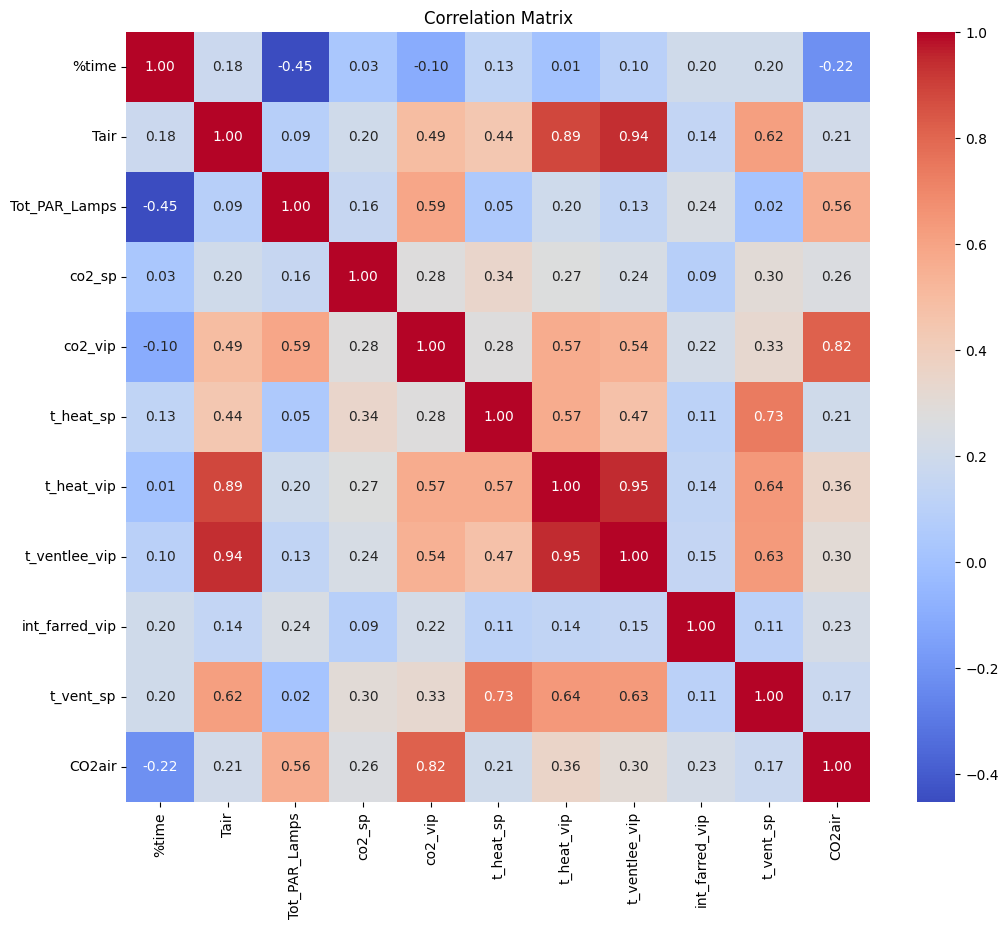

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

###Linear Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features = [
    "%time",
    "Tair",
    "Tot_PAR_Lamps",
    "co2_sp",
    "co2_vip",
    "t_heat_sp",
    "t_heat_vip",
    "t_ventlee_vip",
    "int_farred_vip",
    "t_vent_sp",
]

target = "CO2air"

data = data.apply(pd.to_numeric, errors='coerce')
data.fillna(data.mean(), inplace=True)

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print("\nFeature Importance:")
print(coef_df.sort_values(by='Coefficient', ascending=False))


Mean Squared Error: 0.0034267489530326787
R2 Score: 0.7514986607128744

Feature Importance:
          Feature  Coefficient
4         co2_vip     0.308053
7   t_ventlee_vip     0.121100
6      t_heat_vip     0.081756
5       t_heat_sp     0.060846
3          co2_sp     0.041741
8  int_farred_vip     0.037766
0           %time    -0.000194
2   Tot_PAR_Lamps    -0.003180
9       t_vent_sp    -0.019738
1            Tair    -0.374883


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
dt = DecisionTreeRegressor(max_depth=5)
svr = SVR()

In [ ]:
estimators = [('svr' , svr),('dt',dt)]

In [ ]:
for estimator in estimators:
    estimator[1].fit(X_train, y_train)
    score = estimator[1].score(X_test, y_test)
    print(estimator[0], np.round(score, 2))

svr 0.02
dt 0.8


In [ ]:
#RAM KILLER
# from sklearn.kernel_ridge import KernelRidge
# kr = KernelRidge(alpha=1.0, kernel='linear')

# kr.fit(X_train, y_train)

# y_pred = kr.predict(X_test)


# from sklearn.metrics import r2_score
# print("R^2 Score:", r2_score(y_test, y_pred))

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=42)
rf.fit(X_train, y_train)
score = rf.score(X_test, y_test)
print("RandomForestRegressor", np.round(score, 2))

RandomForestRegressor 0.91


In [ ]:
estimators = [('lr',model) , ('rf',rf) , ('dt',dt)]

In [ ]:
from sklearn.ensemble import VotingRegressor
vr = VotingRegressor(estimators)
vr.fit(X_train, y_train)
score = vr.score(X_test, y_test)
print('voting regressor', np.round(score, 2))

voting regressor 0.87


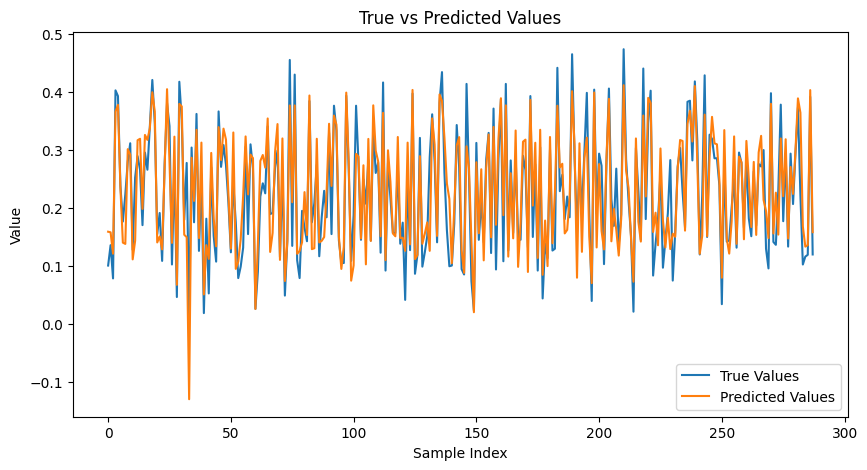

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:288], label='True Values')
plt.plot(y_pred[:288], label='Predicted Values')
plt.xlabel('Sample Index')
plt.title('True vs Predicted Values')
plt.ylabel('Value')
plt.legend()
plt.show()